In [12]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
import pandas as pd, numpy as np
import matplotlib as mpl
from sklearn.ensemble import RandomForestClassifier 
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_validate
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay
import joblib
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, roc_curve




In [13]:
# data = pd.read_csv('/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/data/科技人员抑郁量表-重要特征数据.csv')
# y = data['depression']
# X = data.drop('depression', axis=1)

In [18]:
data = pd.read_csv('/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/data/科技人员心理健康处理后数据.csv')
# y = data['anxiety']
# X = data.drop('anxiety', axis=1)
x = data.loc[:, "OSI6":"WFCS3"]
# y = data.loc[:, "anxiety"]
# y = data.loc[:, "depression"]
y = data.loc[:, "suicide"]


/Users/wangxiaoyan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/Users/wangxiaoyan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


平均得分： 0.96
交叉验证准确性： [1.         0.93333333 0.93333333 0.93333333 1.        ]
交叉验证平均准确性： 0.96


/Users/wangxiaoyan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


交叉验证召回率： [1.  0.5 0.5 0.5 1. ]


/Users/wangxiaoyan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


交叉验证F1值： [1.         0.48275862 0.48275862 0.48275862 1.        ]
Accuracy: 93.33


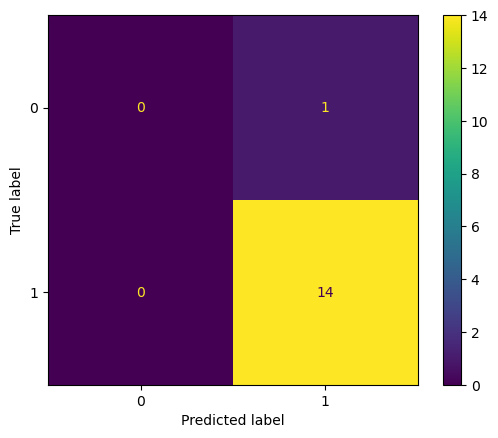

In [19]:
rfc = RandomForestClassifier(n_estimators=100,max_depth = 8, min_samples_split = 6, random_state=7)
# 进行交叉验证，得到预测结果
scores = cross_val_score(rfc, X, y, cv=5)
y_pred = cross_val_predict(rfc, X, y, cv=5)

# 输出交叉验证得分和分类报告
print('平均得分：', scores.mean())
print("交叉验证准确性：", scores)
print("交叉验证平均准确性：", np.mean(scores))
print("交叉验证召回率：", cross_val_score(rfc, X, y, cv=5, scoring='recall_macro'))
print("交叉验证F1值：", cross_val_score(rfc, X, y, cv=5, scoring='f1_macro'))

# 预测所有数据并生成混淆矩阵
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

y_pred = rfc.fit(x_train, y_train).predict(x_test)
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %.2f' % (accuracy*100))

# 绘制混淆矩阵
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=8)

In [5]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [6]:
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [7]:
y_pred = rf.predict(X_test)


In [8]:
# calculate precision and recall
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')

# evaluate the performance of the model
score = rf.score(X_test, y_test)
print("Accuracy: {:.2f}%".format(score * 100))
print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))


Accuracy: 88.89%
Precision: 84.05%
Recall: 88.89%


/Users/wangxiaoyan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
